#Twitter Disaster Recognition- NLP

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re
import string

from sklearn.model_selection import train_test_split

- Imports all required Python libraries.

In [2]:
df = pd.read_csv("C:/NextHikes Solutions/Twitter Disaster NLP/train.csv")

- Loads the train.csv file.

In [3]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


- Displays the first few rows of the dataset.

In [4]:
df.shape

(7613, 5)

- Shows the size of the dataset, which contains 7,613 rows and 5 columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


- Provides detailed information about each column, including data types and missing values.

In [6]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

- Checks how many missing values are present in each column of the dataset.

In [7]:
df['target'].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

- Shows how many tweets are non-disaster (0) and how many are real disaster tweets (1).

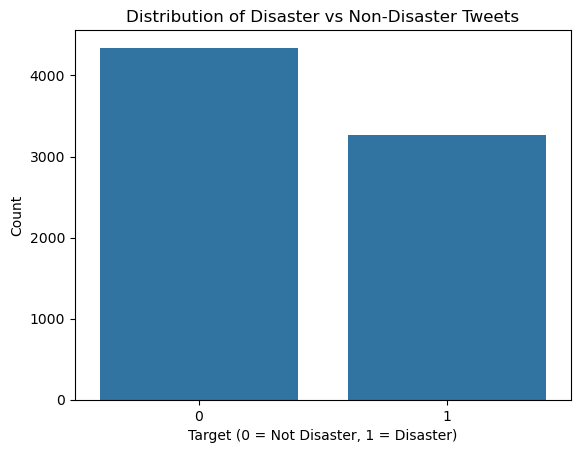

In [8]:
sns.countplot(x='target', data=df)
plt.title("Distribution of Disaster vs Non-Disaster Tweets")
plt.xlabel("Target (0 = Not Disaster, 1 = Disaster)")
plt.ylabel("Count")
plt.show()

- Visualizes the distribution of disaster vs non-disaster tweets using a bar chart.

In [9]:
disaster_tweets = df[df['target'] == 1]

disaster_tweets['keyword'].value_counts().head(10)

keyword
derailment           39
wreckage             39
outbreak             39
debris               37
oil%20spill          37
typhoon              37
evacuated            32
suicide%20bombing    32
rescuers             32
suicide%20bomb       32
Name: count, dtype: int64

- Filters only real disaster tweets and shows the most common disaster-related keywords used in them.

In [10]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text)  
    text = re.sub(r'\d+', '', text)             
    text = text.translate(str.maketrans('', '', string.punctuation)) 
    text = re.sub(r'\s+', ' ', text).strip()   
    return text

- Defines a function to clean tweet text by removing URLs, numbers, punctuation, and extra spaces.

In [11]:
df['clean_text'] = df['text'].apply(clean_text)

df[['text', 'clean_text']].head()

,text,clean_text
0,Our Deeds are the Reason of this #earthquake M...,our deeds are the reason of this earthquake ma...
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,all residents asked to shelter in place are be...
3,"13,000 people receive #wildfires evacuation or...",people receive wildfires evacuation orders in ...
4,Just got sent this photo from Ruby #Alaska as ...,just got sent this photo from ruby alaska as s...


- Applies the text cleaning function to all tweets and shows the original text alongside the cleaned version.

In [12]:
df['tokens'] = df['clean_text'].apply(lambda x: x.split())

df[['clean_text', 'tokens']].head()

,clean_text,tokens
0,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth..."
1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]"
2,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place..."
3,people receive wildfires evacuation orders in ...,"[people, receive, wildfires, evacuation, order..."
4,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala..."


- Splits the cleaned tweet text into individual words (tokens) for basic text analysis.

In [13]:
df['target'].unique()

array([1, 0], dtype=int64)

- Confirms that the target variable contains only two classes: disaster (1) and non-disaster (0).

In [14]:
import os

os.chdir(r"C:\NextHikes Solutions\Twitter Disaster NLP")

- Sets the working directory so files can be saved and accessed easily.

In [15]:
X = df['clean_text']
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (6090,)
Testing set size: (1523,)


- Splits the cleaned tweet text and target labels into training and testing sets and shows their sizes.
- 6,090 tweets are used for training and 1,523 tweets are kept for testing.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

- Imports machine learning models, text vectorization methods, evaluation metrics, and sentiment analysis tools.

In [17]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ALANKAR\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

- Downloads the VADER sentiment lexicon needed for sentiment analysis and confirms it is ready to use.

In [18]:
bow = CountVectorizer(max_features=5000)

X_train_bow = bow.fit_transform(X_train)
X_test_bow = bow.transform(X_test)

- Converts tweet text into numerical features using the Bag of Words method.

In [19]:
tfidf = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

- Converts tweet text into TF-IDF features to capture word importance across all tweets.

In [20]:
sia = SentimentIntensityAnalyzer()

df['sentiment_score'] = df['clean_text'].apply(
    lambda x: sia.polarity_scores(x)['compound']
)

df[['clean_text', 'sentiment_score']].head()

,clean_text,sentiment_score
0,our deeds are the reason of this earthquake ma...,0.2732
1,forest fire near la ronge sask canada,-0.3400
2,all residents asked to shelter in place are be...,-0.2960
3,people receive wildfires evacuation orders in ...,0.0000
4,just got sent this photo from ruby alaska as s...,0.0000


- Calculates sentiment scores for each tweet using VADER to understand emotional tone.
- Shows the cleaned tweet text along with its corresponding sentiment score.

In [21]:
df['tweet_length'] = df['clean_text'].apply(len)

- Calculates the length of each tweet based on the number of characters.

In [22]:
df['hashtag_count'] = df['text'].apply(lambda x: x.count('#'))

- Counts how many hashtags (#) are present in each tweet.

In [23]:
df['mention_count'] = df['text'].apply(lambda x: x.count('@'))

- Counts how many user mentions (@) are present in each tweet.

In [24]:
X_train_final = X_train_tfidf
X_test_final = X_test_tfidf

- Selects TF-IDF features as the final input representation for model training and testing.

In [25]:
lr = LogisticRegression(max_iter=1000)

cv_scores = cross_val_score(lr, X_train_final, y_train, cv=5, scoring='accuracy')

print("Logistic Regression CV Accuracy:", cv_scores.mean())

Logistic Regression CV Accuracy: 0.7950738916256157


- Trains a Logistic Regression model and evaluates its performance using 5-fold cross-validation.
- Logistic Regression achieves around 79.5% cross-validation accuracy.

In [26]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

cv_scores_rf = cross_val_score(rf, X_train_final, y_train, cv=5, scoring='accuracy')

print("Random Forest CV Accuracy:", cv_scores_rf.mean())

Random Forest CV Accuracy: 0.7779967159277504


- Trains a Random Forest model and evaluates it using cross-validation for comparison.
- Random Forest performs slightly worse than Logistic Regression in cross-validation.

In [27]:
lr.fit(X_train_final, y_train)

y_pred = lr.predict(X_test_final)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test Accuracy: 0.8187787261982928
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       869
           1       0.84      0.72      0.77       654

    accuracy                           0.82      1523
   macro avg       0.82      0.81      0.81      1523
weighted avg       0.82      0.82      0.82      1523



- Trains the Logistic Regression model on full training data and evaluates it on the test set using accuracy and classification metrics.
- Final model achieves about 82% test accuracy, with balanced precision and recall for both classes.

In [28]:
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2']
}

grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid.fit(X_train_final, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

Best Parameters: {'C': 1, 'penalty': 'l2'}
Best CV Score: 0.7950738916256157


- Uses Grid Search to find the best hyperparameters for the Logistic Regression model.
- Best Logistic Regression settings are C = 1 with L2 penalty, giving the highest cross-validation accuracy.

In [29]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
    precision_recall_curve
)

import matplotlib.pyplot as plt

- Imports different evaluation metrics and plotting tools.

In [30]:
lr_pred = lr.predict(X_test_final)
lr_prob = lr.predict_proba(X_test_final)[:, 1]

rf.fit(X_train_final, y_train)
rf_pred = rf.predict(X_test_final)
rf_prob = rf.predict_proba(X_test_final)[:, 1]

- Generates predictions and prediction probabilities for both Logistic Regression and Random Forest models.

In [31]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1-score :", f1_score(y_true, y_pred))
    print()

- Defines a reusable function to evaluate models using accuracy, precision, recall, and F1-score.

In [32]:
evaluate_model(y_test, lr_pred, "Logistic Regression")
evaluate_model(y_test, rf_pred, "Random Forest")

--- Logistic Regression ---
Accuracy : 0.8187787261982928
Precision: 0.8387096774193549
Recall   : 0.7155963302752294
F1-score : 0.7722772277227723

--- Random Forest ---
Accuracy : 0.8017071569271176
Precision: 0.8308270676691729
Recall   : 0.6758409785932722
F1-score : 0.7453625632377741



- Compares the performance of Logistic Regression and Random Forest on the test dataset using key metrics.
- Logistic Regression performs slightly better than Random Forest across all evaluation metrics.

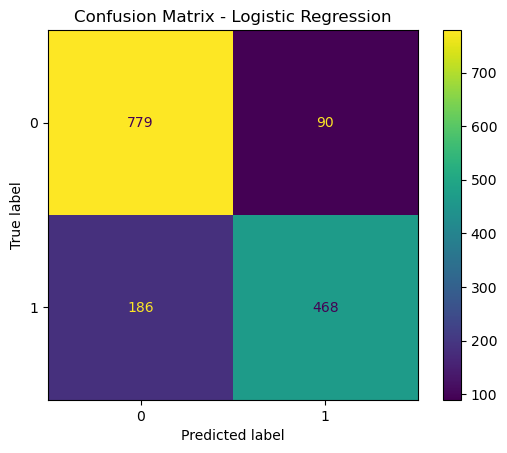

In [33]:
cm_lr = confusion_matrix(y_test, lr_pred)

disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

- Creates and visualizes the confusion matrix to show how well Logistic Regression predicted disaster and non-disaster tweets.
- Model correctly classified most tweets, but it missed some real disaster tweets and misclassified a few normal tweets as disasters.

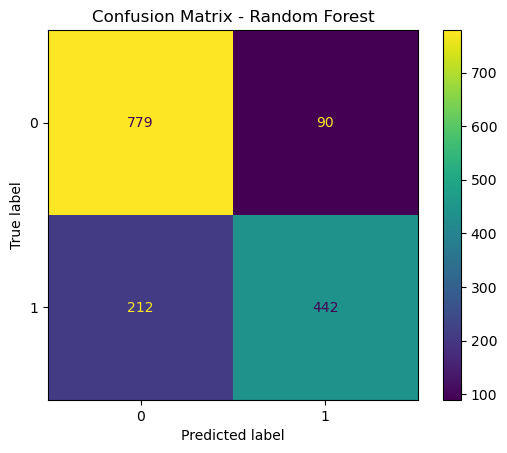

In [34]:
cm_rf = confusion_matrix(y_test, rf_pred)

disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()
plt.title("Confusion Matrix - Random Forest")
plt.show()

- Builds and displays the confusion matrix for the Random Forest model to check how accurately it classified disaster and non-disaster tweets.
- Random Forest correctly identified many tweets, but it missed more real disaster tweets compared to Logistic Regression.

In [35]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_prob)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_prob)
roc_auc_rf = auc(fpr_rf, tpr_rf)

- Calculates the ROC curve values and AUC score to measure how well both models separate disaster and non-disaster tweets.

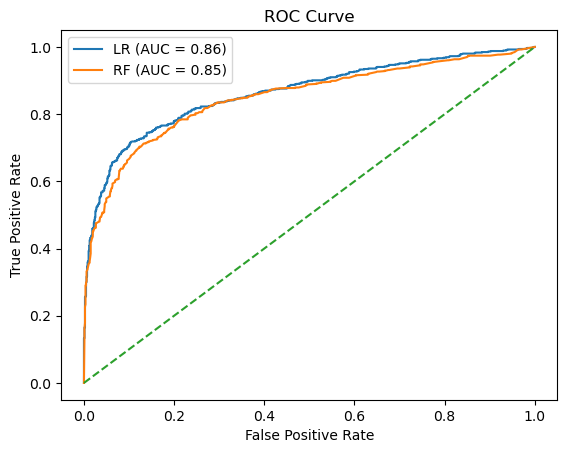

In [36]:
plt.plot(fpr_lr, tpr_lr, label=f"LR (AUC = {roc_auc_lr:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"RF (AUC = {roc_auc_rf:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

- Plots the ROC curves for Logistic Regression and Random Forest to visually compare their overall classification performance.
- Logistic Regression performs slightly better than Random Forest, as shown by its higher AUC value.

In [37]:
precision_lr, recall_lr, _ = precision_recall_curve(y_test, lr_prob)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_prob)

- Calculates precision and recall values at different thresholds for both models.

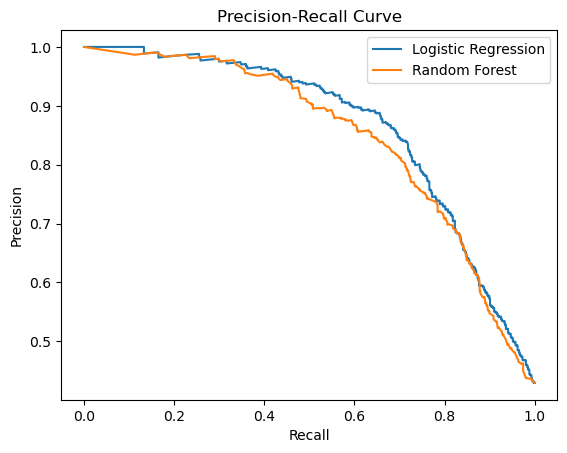

In [38]:
plt.plot(recall_lr, precision_lr, label="Logistic Regression")
plt.plot(recall_rf, precision_rf, label="Random Forest")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

- Plots the Precision-Recall curves to compare how well both models balance precision and recall.
- Logistic Regression maintains slightly better precision than Random Forest at higher recall levels.

In [39]:
model_comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, lr_pred),
        accuracy_score(y_test, rf_pred)
    ],
    "F1-score": [
        f1_score(y_test, lr_pred),
        f1_score(y_test, rf_pred)
    ]
})

model_comparison

,Model,Accuracy,F1-score
0,Logistic Regression,0.818779,0.772277
1,Random Forest,0.801707,0.745363


- Creates a comparison table to see accuracy and F1-score of both models side by side.
- Logistic Regression shows slightly better accuracy and F1-score than Random Forest.

In [40]:
train_pred = lr.predict(X_train_final)

print("Training Accuracy:", accuracy_score(y_train, train_pred))
print("Testing Accuracy :", accuracy_score(y_test, lr_pred))

Training Accuracy: 0.8691297208538588
Testing Accuracy : 0.8187787261982928


- Checks training vs testing accuracy to see if the model is overfitting.
- Training and testing accuracy are close, so the model generalizes well.

In [41]:
best_model = lr
print("Final model selected: Logistic Regression")

Final model selected: Logistic Regression


- Selects Logistic Regression as the final model based on overall better performance.

In [42]:
import pickle

with open("disaster_model.pkl", "wb") as f:
    pickle.dump(lr, f)

with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

- Saves the trained Logistic Regression model and TF-IDF vectorizer as pickle files for deployment.

In [43]:
from flask import Flask, render_template, request
import pickle
import re
import string

app = Flask(__name__)

model = pickle.load(open("disaster_model.pkl", "rb"))
vectorizer = pickle.load(open("tfidf_vectorizer.pkl", "rb"))

- Imports Flask and required libraries, creates the Flask app, and loads the saved model and vectorizer.

In [44]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip()
    return text

- Defines the same text-cleaning function so input text is processed exactly like training data.

In [45]:
@app.route('/')
def home():
    return render_template('index.html')

- Creates the home route that loads the main web page for user input.

In [46]:
@app.route('/predict', methods=['POST'])
def predict():
    tweet = request.form['tweet']
    
    cleaned_tweet = clean_text(tweet)
    vectorized_tweet = vectorizer.transform([cleaned_tweet])
    
    prediction = model.predict(vectorized_tweet)[0]
    
    if prediction == 1:
        result = "🚨 Disaster Related Tweet"
    else:
        result = "✅ Not a Disaster Tweet"
    
    return render_template('index.html', prediction_text=result)

- Defines the prediction route that takes user input, cleans it, converts it to TF-IDF features, and predicts whether it is a disaster tweet.

In [47]:
if __name__ == "__main__":
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\ALANKAR\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py:3680: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


- Starts the Flask server so the web application can run locally in debug mode.

In [48]:
test_df = pd.read_csv("test.csv")

test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


- Loads the test dataset that does not contain the target column.
- Shows a few sample tweets from the test data.

In [49]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip()
    return text

- Cleans tweet text by converting it to lowercase, removing links, punctuation, and extra spaces.

In [50]:
test_df['clean_text'] = test_df['text'].apply(clean_text)

- Applies the text cleaning function to all tweets in the test dataset.

In [51]:
X_test_tfidf = vectorizer.transform(test_df['clean_text'])

- Converts the cleaned test tweets into TF-IDF features using the already trained vectorizer.

In [52]:
test_predictions = model.predict(X_test_tfidf)

- Uses the trained model to predict whether each test tweet is a disaster or not.

In [53]:
submission = pd.DataFrame({
    'id': test_df['id'],
    'target': test_predictions
})

submission.head()

,id,target
0,0,1
1,2,0
2,3,1
3,9,1
4,11,1


- Creates the final prediction table by pairing each tweet ID with its predicted disaster label.
- Shows a preview of predicted results where 1 means disaster and 0 means not a disaster.

In [54]:
submission.to_csv("my_submission.csv", index=False)

- Saves the prediction results into a CSV file.